**Прогноз фьючерсных цен**

На основе регрессионного анализа: статистики Commitments of Traders и агрегированной матрицы будущих цен

# Подготовка данных

### Импорт библиотек

In [17]:
!pip install yfinance

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import urllib.request
from zipfile import ZipFile
from io import BytesIO
from sklearn import linear_model 

### Загрузка архивов

In [19]:
# Disaggregated Futures Only Reports:
Fdisagg_2006_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_hist_2006_2016.zip').read())).open('F_Disagg06_16.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2010 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2010.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2011 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2011.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2012 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2012.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2013 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2013.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2014 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2014.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2015 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2015.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2016.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2017 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2017.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2018 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2018.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2019 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2019.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2020 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2020.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2021 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2021.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})

# Traders in Financial Futures ; Futures Only Reports:
Ffin_2006_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fin_fut_txt_2006_2016.zip').read())).open('F_TFF_2006_2016.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2010 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2010.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2011 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2011.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2012 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2012.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2013 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2013.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2014 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2014.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2015 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2015.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2016.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2017 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2017.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2018 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2018.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2019 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2019.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2020 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2020.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2021 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2021.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,120,121,125,133,134,135,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,186) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (133,145,146,147,148,149,159,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (133,147,148,149,150,159,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (147,148,149,150,159,160) 

### Загрузка словарей

In [1189]:
# Загрузка словаря для корректировки ошибочных наименований (лишние пробелы и пр.)
corrections = pd.read_csv('https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/COTR_Corrections.txt', sep='\t', error_bad_lines=False, skiprows=0)
check = np.array(corrections).tolist()

# Файл со списком дат публикаций отчетов СОТ
dates = pd.read_csv('https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/COTR_Dates_20110104_20210323.txt', parse_dates=True)

# Список инструментов
instruments = pd.read_csv('https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/COTR_Instruments.csv', sep=';', error_bad_lines=False, skiprows=0).set_index(['Index'])

# Ввод параметров

Download_Stock_Prices (ticker, yf_ticker, number_future_weeks, target_price_count, skip_count_less)

*   ticker  - пользовательское название финансового инструмента
*   yf_ticker - биржевой код финансового инструмента
*   number_future_weeks - количество будущих недель для построения матрицы (ширина)
*   target_price_count - целевая цена, значения выше которой будут учитываться
*   skip_count_less - отсечение собранного количества целевых цен, если их меньше

cot_ticker - наименование финансового инструмента в статистике СОТ

In [1190]:
# Выбор инструмента по номеру из списка
set_index_of_instrument = 2

number_future_weeks = 26
target_price_count = 0.10
skip_count_less = 0

last_days = 80

ticker = instruments['Ticker'][set_index_of_instrument]
yf_ticker = instruments['Yf_ticker'][set_index_of_instrument]
cot_ticker = instruments['Cot_ticker'][set_index_of_instrument]

In [1191]:
instruments

,Type,Ticker,Yf_ticker,Cot_ticker
Index,,,,
1,Commodities,Aluminum,ALI=F,ALUMINUM MW US TR PLATTS - COMMODITY EXCHANGE ...
2,Commodities,Coffee,KC=F,COFFEE C - ICE FUTURES U.S.
3,Commodities,Copper,HG=F,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.
4,Commodities,Corn,ZC=F,CORN - CHICAGO BOARD OF TRADE
5,Commodities,CrudeOil_LightSweetWTI,CL=F,"CRUDE OIL, LIGHT SWEET-WTI - ICE FUTURES EUROPE"
6,Commodities,Gold,GC=F,GOLD - COMMODITY EXCHANGE INC.
7,Commodities,Palladium,PA=F,PALLADIUM - NEW YORK MERCANTILE EXCHANGE
8,Commodities,Platinum,PL=F,PLATINUM - NEW YORK MERCANTILE EXCHANGE
9,Commodities,Silver,SI=F,SILVER - COMMODITY EXCHANGE INC.


Не работают:


*   Russian Ruble
*   Index Russell 2000




# Commitments of Traders

### Обработка

Disaggregated Futures Only Reports:

In [1192]:
# Объединение в один df
Fdisagg_2010_now = []
Fdisagg_2010_now = Fdisagg_2010.append(Fdisagg_2011).append(Fdisagg_2012).append(Fdisagg_2013).append(Fdisagg_2014).append(Fdisagg_2015).append(Fdisagg_2016).append(Fdisagg_2017).append(Fdisagg_2018).append(Fdisagg_2019).append(Fdisagg_2020).append(Fdisagg_2021)

# Фильтр лишних колонок
Fdisagg_2010_now = Fdisagg_2010_now.iloc[:, 0:23].drop(Fdisagg_2010_now.columns[[1, 3, 4, 5, 6]], axis=1)

# Замена по списку
for i in range(len(check)):
    Fdisagg_2010_now['Market_and_Exchange_Names'].replace(to_replace = check[i][0], value = check[i][1], inplace = True)

# Переименование столбца дат
Fdisagg_2010_now.rename(columns={'Report_Date_as_YYYY-MM-DD' : 'Date'}, inplace=True)

# Объединение на основе списка дат
Fdisagg_2010_now = dates.merge(Fdisagg_2010_now, on='Date')

Traders in Financial Futures ; Futures Only Reports:

In [1193]:
# Объединение в один df
Ffin_2010_now = []
Ffin_2010_now = Ffin_2010.append(Ffin_2011).append(Ffin_2012).append(Ffin_2013).append(Ffin_2014).append(Ffin_2015).append(Ffin_2016).append(Ffin_2017).append(Ffin_2018).append(Ffin_2019).append(Ffin_2020).append(Ffin_2021)

# Фильтр лишних колонок
Ffin_2010_now = Ffin_2010_now.iloc[:, 0:24].drop(Ffin_2010_now.columns[[1, 3, 4, 5, 6]], axis=1)

# Замена по списку
for i in range(len(check)):
    Ffin_2010_now['Market_and_Exchange_Names'].replace(to_replace = check[i][0], value = check[i][1], inplace = True)

# Переименование столбца дат
Ffin_2010_now.rename(columns={'Report_Date_as_YYYY-MM-DD' : 'Date'}, inplace=True)

# Объединение на основе списка дат
Ffin_2010_now = dates.merge(Ffin_2010_now, on='Date')

# Фьючерсные котировки

In [1194]:
class Download_Stock_Prices(object):

# Матрицы рассчитываются на основе номеров столбцов расчетного датасета

    def __init__(self, ticker, yf_ticker, number_future_weeks, target_price_count, skip_count_less):
        self.ticker = ticker
        self.yf_ticker = yf_ticker
        self.number_future_weeks = number_future_weeks
        self.target_price_count = target_price_count
        self.skip_count_less = skip_count_less

        self.name = ticker
        self.descrip = str(number_future_weeks) + ' / ' + str(round(target_price_count*100,1)) + '%' + ' / ' + str(skip_count_less)

        # Файл с датировкой отчетов СОТ
        pdates = dates
        pdates['Date'] = pd.to_datetime(pdates['Date'])
        self.pdates = pdates['Date']

        # Загрузка с Yahoo и подготовка
        self.ticker = yf.Ticker(yf_ticker).history(period="max")
        self.ticker.index.name = 'Index'
        self.ticker['Date'] = self.ticker.index
        XXX = self.ticker.append(pdates)
        self.ticker = XXX.sort_values(by=['Date', 'Close'], ascending=True).ffill().drop_duplicates(subset=['Date']).merge(pdates['Date'], how='right')
        self.ticker.drop('Dividends', axis=1, inplace=True)
        self.ticker.drop('Stock Splits', axis=1, inplace=True)

        # Переменные названия столбцов
        column_week_prefix = "Week_"
        column_bilweek_prefix = "Bin_Long_Week_"
        column_bisweek_prefix = "Bin_Short_Week_"
        column_binweek_prefix = "Bin_Neut_Week_"

        # matrix: CLOSE real
        for i in range(number_future_weeks):
            self.ticker[str(column_week_prefix + '%03d' % (i+1))] = ((self.ticker['Close'].shift(-i-1)) / self.ticker['Close'] - 1)

        # matrix: CLOSE long binary
        for i in range(number_future_weeks):
            self.ticker[str(column_bilweek_prefix + '%03d' % (i+1))] = ((self.ticker['Close'].shift(-i-1)) / self.ticker['Close'] - 1)

            self.ticker.loc[self.ticker[str(column_bilweek_prefix + '%03d' % (i+1))] >= target_price_count, str(column_bilweek_prefix + '%03d' % (i+1))] = 1
            self.ticker.loc[self.ticker[str(column_bilweek_prefix + '%03d' % (i+1))] < target_price_count, str(column_bilweek_prefix + '%03d' % (i+1))] = 0

        # matrix: CLOSE short binary
        for i in range(number_future_weeks):
            self.ticker[str(column_bisweek_prefix + '%03d' % (i+1))] = ((self.ticker['Close'].shift(-i-1)) / self.ticker['Close'] - 1)

            self.ticker.loc[self.ticker[str(column_bisweek_prefix + '%03d' % (i+1))]*(-1) <= target_price_count, str(column_bisweek_prefix + '%03d' % (i+1))] = 0
            self.ticker.loc[self.ticker[str(column_bisweek_prefix + '%03d' % (i+1))]*(-1) > target_price_count, str(column_bisweek_prefix + '%03d' % (i+1))] = 1

    def price_tape(self):
        return self.ticker.iloc[:, :6]

    def close_price(self):
        return self.ticker['Close']

    def low_price(self):
        return self.ticker['Low']

    def high_price(self):
        return self.ticker['High']

    def fmx_real(self):
        matrix_real = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks*2 : self.number_future_weeks*3]
        return matrix_real

    def fmx_bilong(self):
        matrix_bilong = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks]
        return matrix_bilong

    def fmx_bishort(self):
        matrix_bishort = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2]
        return matrix_bishort

    def fmx_sum_bilong(self):
        return self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1)

    def fmx_sum_bishort(self):
        return self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)

    def fmx_sum_binet(self):
        return self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1) - self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)

    def fmx_sum_bil_skip(self):
        sum_bilong = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1)
        sum_bilong = sum_bilong.where(sum_bilong >= self.skip_count_less, 0)
        return pd.DataFrame(sum_bilong, columns=['Longs amount sum'])

    def fmx_sum_bis_skip(self):
        sum_bishort = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_bishort = sum_bishort.where(sum_bishort >= self.skip_count_less, 0)
        return pd.DataFrame(sum_bishort, columns=['Shorts amount sum'])

    def fmx_sum_bin_skip(self):
        sum_binet = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1) - self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_binet = sum_binet.where(abs(sum_binet) >= self.skip_count_less, 0)
        return pd.DataFrame(sum_binet, columns=['Nets amount sum'])

    def fmx_sum_bilbisbin_skip(self):
        sum_bilong = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1)
        sum_bilong = sum_bilong.where(sum_bilong >= self.skip_count_less, 0)
        sum_bishort = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_bishort = sum_bishort.where(sum_bishort >= self.skip_count_less, 0)
        sum_binet = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1) - self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_binet = sum_binet.where(abs(sum_binet) >= self.skip_count_less, 0)
        return pd.concat([pd.DataFrame(self.pdates, columns=['Date']), pd.DataFrame(sum_bilong, columns=['Longs amount sum']), pd.DataFrame(sum_bishort, columns=['Shorts amount sum']), pd.DataFrame(sum_binet, columns=['Nets amount sum'])], axis=1)

# Вывод данных

In [1195]:
prices = Download_Stock_Prices(ticker, yf_ticker, number_future_weeks, target_price_count, skip_count_less)

Fdisagg_model = Fdisagg_2010_now.loc[Fdisagg_2010_now['Market_and_Exchange_Names'] == cot_ticker]
Ffin_model = Ffin_2010_now.loc[Ffin_2010_now['Market_and_Exchange_Names'] == cot_ticker]

if instruments.loc[instruments['Ticker']==ticker]['Type'].any() == 'Commodities':
    use_model = Fdisagg_model
elif instruments.loc[instruments['Ticker']==ticker]['Type'].any() == 'Financial':
    use_model = Ffin_model

### model Net

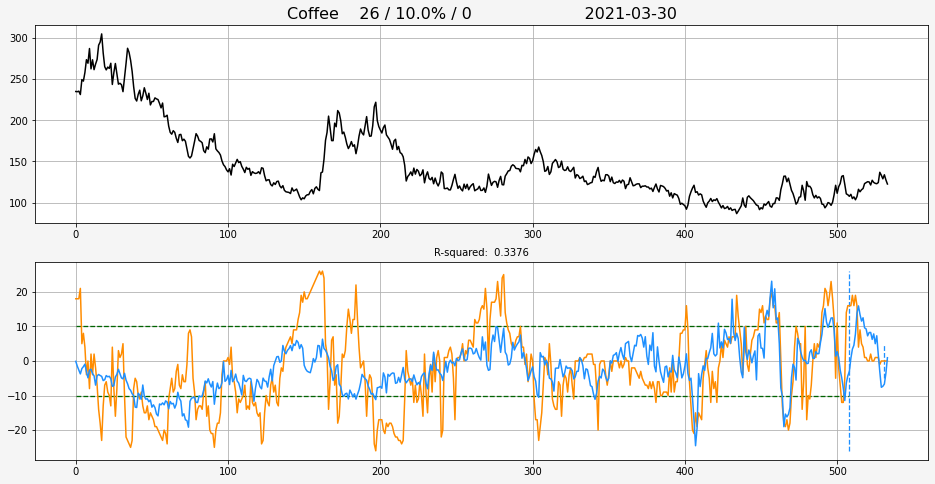

In [1196]:
y = prices.fmx_sum_bin_skip()
x = use_model.iloc[:, 2:]

model = linear_model.LinearRegression() 
model.fit(x, y)
prediction = model.predict(x)

score = model.score(x, y)

fig = plt.figure()
ax_1 = fig.add_subplot(2, 1, 1)
ax_1.grid()
ax_2 = fig.add_subplot(2, 1, 2)
ax_2.grid()

fig.set(facecolor = 'whitesmoke')

ax_1.set_title(prices.name+'    '+prices.descrip+'                      '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10], fontsize = 16)
ax_1.plot(prices.close_price(), color='black')
ax_2.set_title('R-squared:  '+str(round(score, 4)), fontsize = 10)
ax_2.plot(y, color='darkorange')
ax_2.plot(prediction, color='dodgerblue')
plt.hlines(10, 0, len(dates)-number_future_weeks, color = 'darkgreen', linewidth = 1.3, linestyle = '--')
plt.hlines(-10, 0, len(dates)-number_future_weeks, color = 'darkgreen', linewidth = 1.3, linestyle = '--')
# plt.hlines(5, 0, len(dates)-number_future_weeks, color = 'darkred', linewidth = 1.3, linestyle = '--')
# plt.hlines(-5, 0, len(dates)-number_future_weeks, color = 'darkred', linewidth = 1.3, linestyle = '--')

plt.vlines(len(dates)-number_future_weeks, -number_future_weeks, number_future_weeks, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')
plt.vlines(len(dates)-3, -5, 5, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')

fig.set_figwidth(16)
fig.set_figheight(8)
fig.show()

### model long/short

In [1197]:
bil = prices.fmx_sum_bil_skip()
bis = prices.fmx_sum_bis_skip()
bin = prices.fmx_sum_bin_skip()
x = use_model.iloc[:, 2:]

model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression() 
model3 = linear_model.LinearRegression() 
model1.fit(x, bil)
model2.fit(x, bis)
model3.fit(x, bin)

bil = model1.predict(x)
bis = model2.predict(x)
bin = model3.predict(x)

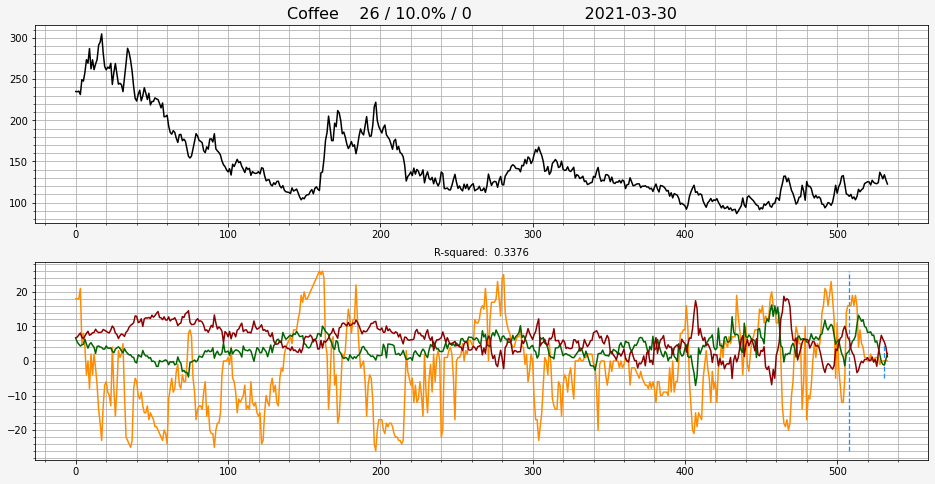

In [1198]:
fig = plt.figure()
ax_1 = fig.add_subplot(2, 1, 1)
ax_1.grid(which='both')
ax_1.minorticks_on()
ax_2 = fig.add_subplot(2, 1, 2)
ax_2.grid(which='both')
ax_2.minorticks_on()

fig.set(facecolor = 'whitesmoke')

ax_1.set_title(prices.name+'    '+prices.descrip+'                      '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10], fontsize = 16)
ax_1.plot(prices.close_price(), color='black')
ax_2.set_title('R-squared:  '+str(round(model.score(x, y), 4)), fontsize = 10)
ax_2.plot(y, color='darkorange')
ax_2.plot(bil, color='darkgreen')
ax_2.plot(bis, color='darkred')
# ax_2.plot(bin, color='dodgerblue')

plt.vlines(len(dates)-number_future_weeks, -number_future_weeks, number_future_weeks, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')
plt.vlines(len(dates)-3, -5, 5, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')

fig.set_figwidth(16)
fig.set_figheight(8)
fig.show()

### model last days

In [1199]:
bil2 = []
bis2 = []
for i in range(len(bil)):
    bil2.append(bil[i][0])
for i in range(len(bis)):
    bis2.append(-bis[i][0])

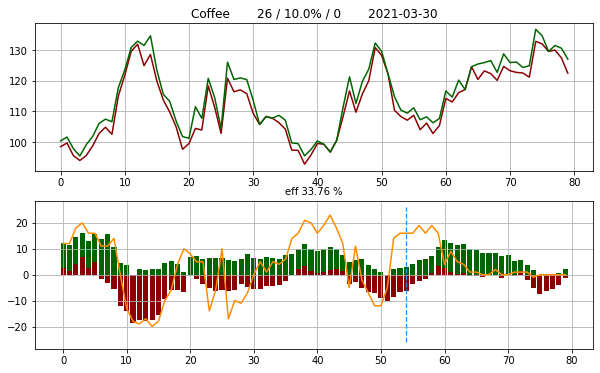

In [1200]:
bil3 = bil2[len(bil2)-last_days:len(bil2)]
bis3 = bis2[len(bis2)-last_days:len(bis2)]

xx = np.arange(0, last_days)

fig = plt.figure()

ax_1 = fig.add_subplot(2, 1, 1)
ax_1.grid(which='both')
ax_2 = fig.add_subplot(2, 1, 2)
ax_2.grid(which='both')

close = np.array(prices.close_price()[len(prices.close_price())-last_days : len(prices.close_price())])
low = np.array(prices.low_price()[len(prices.low_price())-last_days : len(prices.low_price())])
high = np.array(prices.high_price()[len(prices.high_price())-last_days : len(prices.high_price())])

y2 = np.array(y[len(y)-last_days:len(y)])

ax_1.plot(low, color='darkred')
ax_1.plot(high, color='darkgreen')
ax_2.bar(xx, bil3, color='darkgreen')
ax_2.bar(xx, bis3, color='darkred')
ax_2.plot(y2, color='darkorange')
ax_1.set_title(prices.name+'       '+prices.descrip+'       '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10])
ax_2.set_title('eff '+str(round(score*100, 2))+' %', fontsize = 10)

plt.vlines(last_days-number_future_weeks, -26, 26, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')

fig.set_figwidth(10)
fig.set_figheight(6)
fig.show()

In [1209]:
discount = 1

mbil = (1+(target_price_count*(bil/discount)))
mbis = (1-(target_price_count*(bis/discount)))
mbin = (1+(target_price_count*(bin/discount)))

In [1210]:
mbil2 = []
for i in range(len(mbil)): mbil2.append(mbil[i][0])
mbis2 = []
for i in range(len(mbis)): mbis2.append(mbis[i][0])
mbin2 = []
for i in range(len(mbin)): mbin2.append(mbin[i][0])

In [1211]:
pbil = mbil2 * prices.high_price()
pbis = mbis2 * prices.low_price()
pbin = mbin2 * prices.close_price()

In [1212]:
for i in range(number_future_weeks): pbil.loc[len(dates)+i+1] = 0
for i in range(number_future_weeks): pbis.loc[len(dates)+i+1] = 0
for i in range(number_future_weeks): pbin.loc[len(dates)+i+1] = 0

In [1213]:
pbil = pbil.shift(number_future_weeks)[number_future_weeks:]
pbis = pbis.shift(number_future_weeks)[number_future_weeks:]
pbin = pbin.shift(number_future_weeks)[number_future_weeks:]

In [1214]:
clo = prices.close_price()
clo = clo[number_future_weeks:]

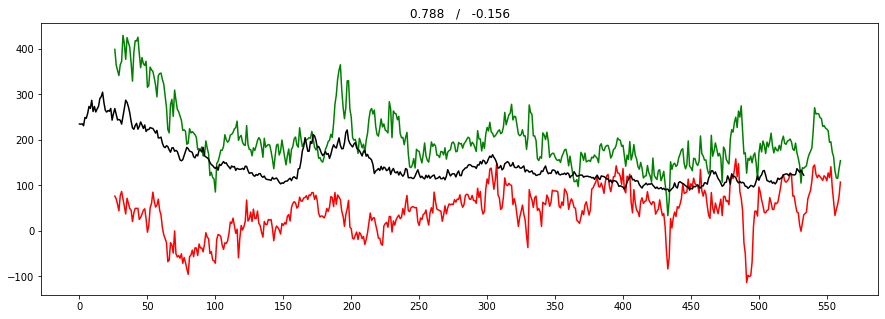

In [1215]:
axx = np.arange(0, len(dates)+number_future_weeks, 50)
plt.figure(figsize=(15,5))
plt.title(str(round(clo.corr(pbil),3))+'   /   '+str(round(clo.corr(pbis),3)))
plt.xticks(axx)
plt.plot(pbil, color='green')
plt.plot(pbis, color='red')
# plt.plot(pbin)

plt.plot(prices.close_price(), color='black')

plt.show()

In [1216]:
# alist.append(clo.corr(pbil))
# blist.append(clo.corr(pbis))
# clist.append(clo.corr(pbin))
clo.corr(clo.shift(number_future_weeks))

0.6605360366873146